# Logistic Regression Classification

## Introduction

Logistic regression is a fundamental classification algorithm that models the probability of a binary outcome. Despite its name, it is a classification method rather than a regression technique. It serves as a cornerstone of statistical learning and provides an excellent foundation for understanding more complex classification algorithms.

## Mathematical Foundation

### The Logistic Function (Sigmoid)

The logistic function transforms any real-valued input into a probability between 0 and 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where $z$ is the linear combination of features:

$$z = \mathbf{w}^T \mathbf{x} + b = \sum_{i=1}^{n} w_i x_i + b$$

### Probability Model

For binary classification with classes $y \in \{0, 1\}$, logistic regression models:

$$P(y=1 | \mathbf{x}; \mathbf{w}, b) = \sigma(\mathbf{w}^T \mathbf{x} + b)$$

$$P(y=0 | \mathbf{x}; \mathbf{w}, b) = 1 - \sigma(\mathbf{w}^T \mathbf{x} + b)$$

### Log-Odds (Logit) Interpretation

The logit function is the inverse of the sigmoid:

$$\text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \mathbf{w}^T \mathbf{x} + b$$

This shows that logistic regression models the log-odds as a linear function of the features.

### Maximum Likelihood Estimation

Given a dataset $\{(\mathbf{x}_i, y_i)\}_{i=1}^{m}$, the likelihood function is:

$$L(\mathbf{w}, b) = \prod_{i=1}^{m} \hat{p}_i^{y_i} (1 - \hat{p}_i)^{1-y_i}$$

where $\hat{p}_i = \sigma(\mathbf{w}^T \mathbf{x}_i + b)$.

### Cross-Entropy Loss Function

Taking the negative log-likelihood gives the binary cross-entropy loss:

$$J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \ln(\hat{p}_i) + (1 - y_i) \ln(1 - \hat{p}_i) \right]$$

### Gradient Descent Update Rules

The gradients of the loss function are:

$$\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_i - y_i) x_{ij}$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_i - y_i)$$

The parameters are updated as:

$$\mathbf{w} := \mathbf{w} - \alpha \nabla_{\mathbf{w}} J$$

$$b := b - \alpha \frac{\partial J}{\partial b}$$

where $\alpha$ is the learning rate.

## Implementation

We will implement logistic regression from scratch and apply it to a synthetic binary classification dataset.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)

### Generate Synthetic Dataset

We create a two-class dataset with two features for visualization purposes.

In [4]:
def generate_dataset(n_samples=200, noise=0.1):
    """
    Generate a synthetic binary classification dataset.
    
    Parameters:
    -----------
    n_samples : int
        Total number of samples
    noise : float
        Standard deviation of Gaussian noise
    
    Returns:
    --------
    X : ndarray of shape (n_samples, 2)
        Feature matrix
    y : ndarray of shape (n_samples,)
        Binary labels
    """
    n_per_class = n_samples // 2
    
    # Class 0: centered at (-1, -1)
    X0 = np.random.randn(n_per_class, 2) * 0.8 + np.array([-1, -1])
    
    # Class 1: centered at (1, 1)
    X1 = np.random.randn(n_per_class, 2) * 0.8 + np.array([1, 1])
    
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])
    
    # Shuffle the dataset
    indices = np.random.permutation(n_samples)
    X = X[indices]
    y = y[indices]
    
    return X, y

# Generate dataset
X, y = generate_dataset(n_samples=300)

print(f"Dataset shape: X={X.shape}, y={y.shape}")
print(f"Class distribution: {np.sum(y==0):.0f} samples in class 0, {np.sum(y==1):.0f} samples in class 1")

Dataset shape: X=(300, 2), y=(300,)
Class distribution: 150 samples in class 0, 150 samples in class 1


### Logistic Regression Class Implementation

In [5]:
class LogisticRegression:
    """
    Logistic Regression classifier using gradient descent.
    
    Parameters:
    -----------
    learning_rate : float
        Learning rate for gradient descent
    n_iterations : int
        Number of training iterations
    """
    
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def _sigmoid(self, z):
        """Compute the sigmoid function."""
        # Clip values to avoid overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _compute_loss(self, y, y_pred):
        """Compute binary cross-entropy loss."""
        m = len(y)
        # Add small epsilon to avoid log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y):
        """
        Train the logistic regression model.
        
        Parameters:
        -----------
        X : ndarray of shape (n_samples, n_features)
            Training features
        y : ndarray of shape (n_samples,)
            Training labels
        """
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Record loss
            loss = self._compute_loss(y, y_pred)
            self.loss_history.append(loss)
        
        return self
    
    def predict_proba(self, X):
        """Predict class probabilities."""
        z = np.dot(X, self.weights) + self.bias
        return self._sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        """Predict class labels."""
        return (self.predict_proba(X) >= threshold).astype(int)

### Train-Test Split

In [6]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Split dataset into training and test sets.
    
    Parameters:
    -----------
    X : ndarray
        Features
    y : ndarray
        Labels
    test_size : float
        Proportion of test set
    random_state : int
        Random seed
    
    Returns:
    --------
    X_train, X_test, y_train, y_test
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = len(y)
    n_test = int(n_samples * test_size)
    
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 240 samples
Test set: 60 samples


### Model Training

In [7]:
# Create and train the model
model = LogisticRegression(learning_rate=0.5, n_iterations=500)
model.fit(X_train, y_train)

# Display learned parameters
print(f"Learned weights: w = [{model.weights[0]:.4f}, {model.weights[1]:.4f}]")
print(f"Learned bias: b = {model.bias:.4f}")

Learned weights: w = [3.5958, 3.4944]
Learned bias: b = -0.1908


### Model Evaluation

In [8]:
def compute_metrics(y_true, y_pred):
    """
    Compute classification metrics.
    
    Returns:
    --------
    dict : Dictionary containing accuracy, precision, recall, and F1-score
    """
    # True positives, false positives, etc.
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': np.array([[tn, fp], [fn, tp]])
    }

# Evaluate on training set
y_train_pred = model.predict(X_train)
train_metrics = compute_metrics(y_train, y_train_pred)

# Evaluate on test set
y_test_pred = model.predict(X_test)
test_metrics = compute_metrics(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"  Accuracy:  {train_metrics['accuracy']:.4f}")
print(f"  Precision: {train_metrics['precision']:.4f}")
print(f"  Recall:    {train_metrics['recall']:.4f}")
print(f"  F1-Score:  {train_metrics['f1_score']:.4f}")

print("\nTest Set Metrics:")
print(f"  Accuracy:  {test_metrics['accuracy']:.4f}")
print(f"  Precision: {test_metrics['precision']:.4f}")
print(f"  Recall:    {test_metrics['recall']:.4f}")
print(f"  F1-Score:  {test_metrics['f1_score']:.4f}")

print("\nConfusion Matrix (Test Set):")
print(test_metrics['confusion_matrix'])

Training Set Metrics:
  Accuracy:  0.9750
  Precision: 0.9750
  Recall:    0.9750
  F1-Score:  0.9750

Test Set Metrics:
  Accuracy:  0.9000
  Precision: 0.9286
  Recall:    0.8667
  F1-Score:  0.8966

Confusion Matrix (Test Set):
[[28  2]
 [ 4 26]]


### Visualization

We create a comprehensive visualization showing the decision boundary, training history, and probability contours.

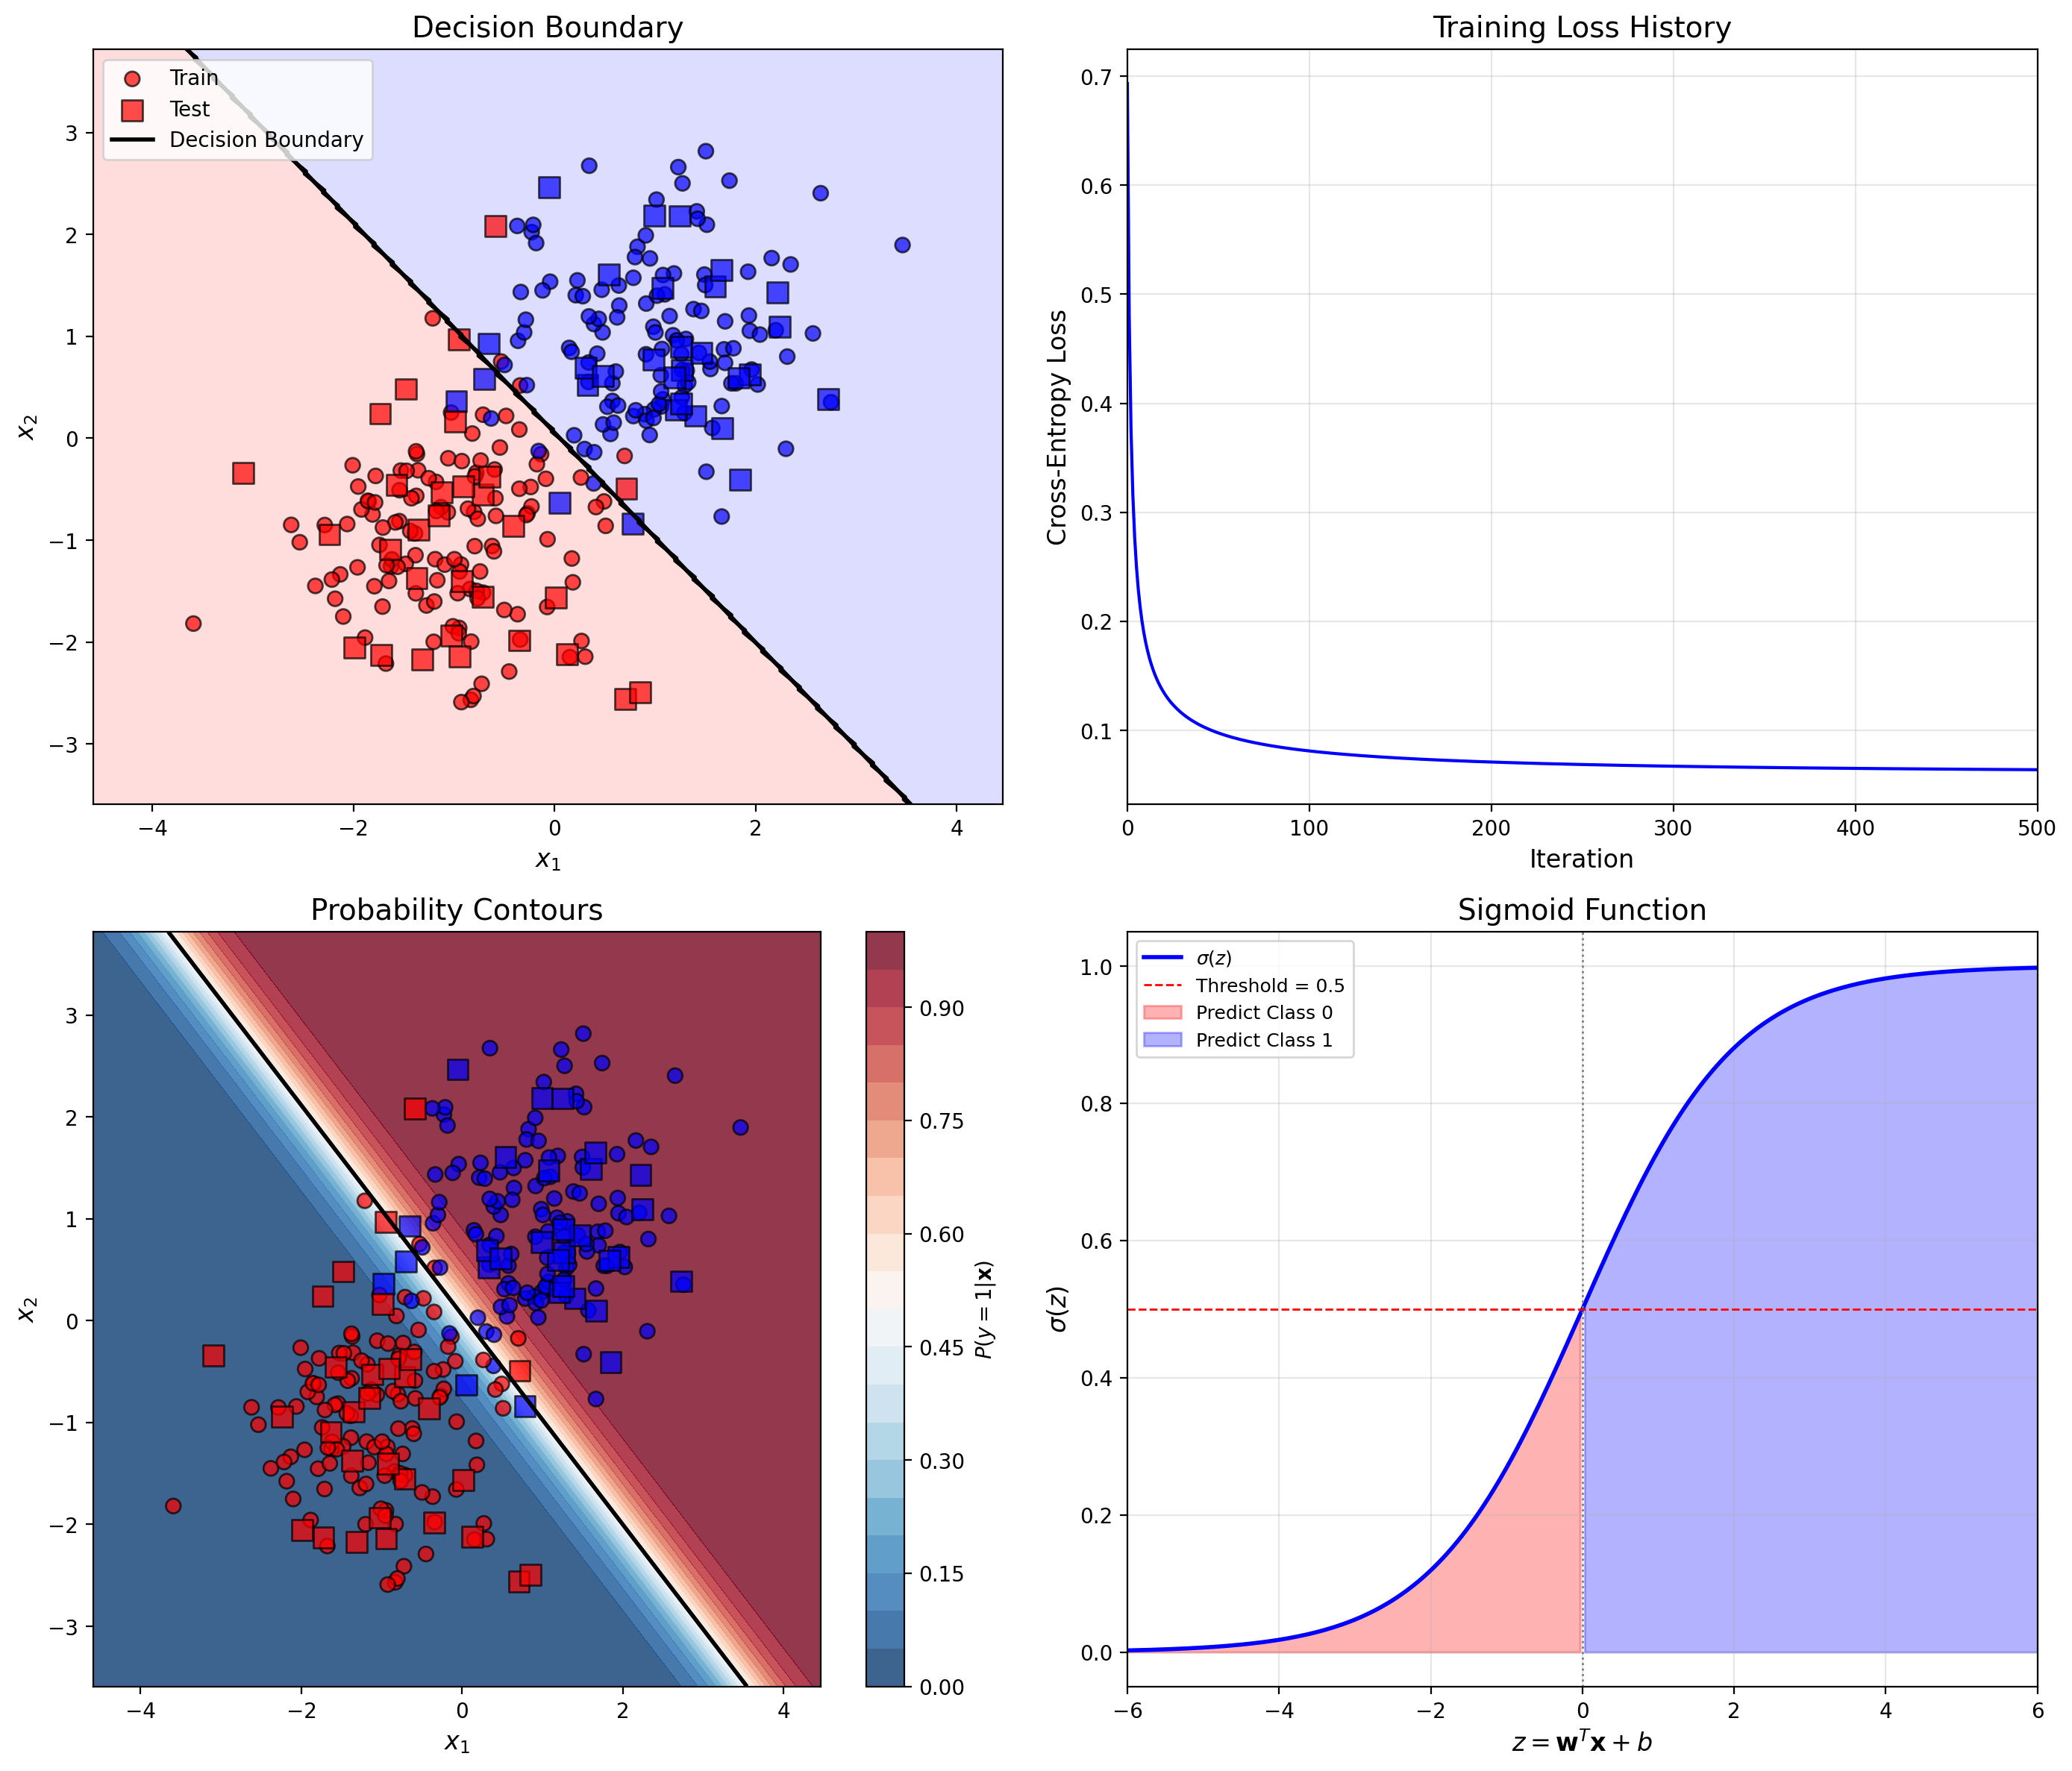


Figure saved as 'plot.png'


In [9]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Plot 1: Decision Boundary
ax1 = axes[0, 0]

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
ax1.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
ax1.contour(xx, yy, Z, colors='k', linewidths=0.5)

# Plot data points
scatter = ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                      cmap=cmap_bold, edgecolors='k', alpha=0.7, s=50, label='Train')
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
            cmap=cmap_bold, edgecolors='k', alpha=0.7, s=100, marker='s', label='Test')

# Plot decision boundary line
w1, w2 = model.weights
b = model.bias
x_boundary = np.linspace(x_min, x_max, 100)
y_boundary = -(w1 * x_boundary + b) / w2
ax1.plot(x_boundary, y_boundary, 'k-', linewidth=2, label='Decision Boundary')

ax1.set_xlabel('$x_1$', fontsize=12)
ax1.set_ylabel('$x_2$', fontsize=12)
ax1.set_title('Decision Boundary', fontsize=14)
ax1.legend(loc='upper left')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

# Plot 2: Training Loss History
ax2 = axes[0, 1]
ax2.plot(model.loss_history, 'b-', linewidth=1.5)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Cross-Entropy Loss', fontsize=12)
ax2.set_title('Training Loss History', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, len(model.loss_history))

# Plot 3: Probability Contours
ax3 = axes[1, 0]

# Compute probability on mesh grid
Z_prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_prob = Z_prob.reshape(xx.shape)

# Plot probability contours
contour = ax3.contourf(xx, yy, Z_prob, levels=20, cmap='RdBu_r', alpha=0.8)
ax3.contour(xx, yy, Z_prob, levels=[0.5], colors='k', linewidths=2)
plt.colorbar(contour, ax=ax3, label='$P(y=1|\mathbf{x})$')

# Plot data points
ax3.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
            cmap=cmap_bold, edgecolors='k', alpha=0.7, s=50)
ax3.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
            cmap=cmap_bold, edgecolors='k', alpha=0.7, s=100, marker='s')

ax3.set_xlabel('$x_1$', fontsize=12)
ax3.set_ylabel('$x_2$', fontsize=12)
ax3.set_title('Probability Contours', fontsize=14)
ax3.set_xlim(x_min, x_max)
ax3.set_ylim(y_min, y_max)

# Plot 4: Sigmoid Function and Decision
ax4 = axes[1, 1]

# Plot sigmoid function
z_range = np.linspace(-6, 6, 200)
sigmoid_values = 1 / (1 + np.exp(-z_range))
ax4.plot(z_range, sigmoid_values, 'b-', linewidth=2, label='$\sigma(z)$')
ax4.axhline(y=0.5, color='r', linestyle='--', linewidth=1, label='Threshold = 0.5')
ax4.axvline(x=0, color='gray', linestyle=':', linewidth=1)

# Highlight regions
ax4.fill_between(z_range, 0, sigmoid_values, where=(z_range < 0), 
                 alpha=0.3, color='red', label='Predict Class 0')
ax4.fill_between(z_range, 0, sigmoid_values, where=(z_range >= 0), 
                 alpha=0.3, color='blue', label='Predict Class 1')

ax4.set_xlabel('$z = \mathbf{w}^T\mathbf{x} + b$', fontsize=12)
ax4.set_ylabel('$\sigma(z)$', fontsize=12)
ax4.set_title('Sigmoid Function', fontsize=14)
ax4.legend(loc='upper left', fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_xlim(-6, 6)
ax4.set_ylim(-0.05, 1.05)

plt.tight_layout()

# Save the figure
plt.savefig('plot.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved as 'plot.png'")

## Discussion

### Key Observations

1. **Linear Decision Boundary**: Logistic regression creates a linear decision boundary in feature space. The equation $\mathbf{w}^T \mathbf{x} + b = 0$ defines this hyperplane.

2. **Probabilistic Output**: Unlike hard classifiers, logistic regression provides calibrated probability estimates, which are valuable for risk assessment and decision-making under uncertainty.

3. **Convex Optimization**: The cross-entropy loss function is convex, guaranteeing convergence to the global minimum with gradient descent.

4. **Interpretability**: Each weight $w_j$ represents the change in log-odds for a one-unit increase in feature $x_j$, holding other features constant.

### Limitations

1. **Linear Separability**: Logistic regression assumes data is linearly separable, which limits its expressiveness for complex decision boundaries.

2. **Feature Engineering**: Performance heavily depends on feature selection and transformation.

3. **Class Imbalance**: Standard logistic regression can be biased toward the majority class in imbalanced datasets.

### Extensions

1. **Regularization**: L1 (Lasso) and L2 (Ridge) penalties can be added to prevent overfitting:
   $$J_{reg} = J + \frac{\lambda}{2m} \|\mathbf{w}\|^2_2$$

2. **Multiclass Classification**: The softmax function generalizes logistic regression to multiple classes (multinomial logistic regression).

3. **Kernel Methods**: Applying kernel tricks can create nonlinear decision boundaries while maintaining the probabilistic framework.

## Conclusion

Logistic regression remains a fundamental tool in machine learning due to its interpretability, efficiency, and probabilistic framework. This implementation demonstrates the core concepts of maximum likelihood estimation, gradient descent optimization, and the sigmoid function. Understanding logistic regression provides a solid foundation for more advanced classification methods, including neural networks where the sigmoid (or softmax) function serves as the output activation.